__Importing Required packages:__
1. Matplotlib
2. Pandas
3. Numpy

"__%matplotlib inline__" is used to get the output from matplotlib(plots, graphs etc..) in the jupyter notebook frontend.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

__Importing DataFrame__

We have downloaded the dataframe from Kaggle and now we will be using __read_csv__ to load it in variable df.

Download Link : https://www.kaggle.com/datasets/sarita19/fuel-consumption?resource=download

In [2]:
df = pd.read_csv("FuelConsumption.csv")

Let's look at the dataset using __.head()__.

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


__Dataset consists of following type information about a vehicle__

__MODELYEAR__ e.g. 2014

__MAKE___ e.g. Acura

__MODEL____ e.g. ILX

__VEHICLE CLASS__ e.g. SUV

__ENGINE SIZE__ e.g. 4.7

__CYLINDERS__ e.g 6

__TRANSMISSION__ e.g. A6

__FUEL CONSUMPTION in CITY(L/100 km)__ e.g. 9.9

__FUEL CONSUMPTION in HWY (L/100 km)__ e.g. 8.9

__FUEL CONSUMPTION COMB (L/100 km)__ e.g. 9.2

__CO2 EMISSIONS (g/km)__ e.g. 182 --> low --> 0



In [4]:
#Let's explore df a bit more.

df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Here, we are trying to establish relation between other variables and C02 Emission. Let's consider some features that might have effect on CO2 emission.

In [5]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


Visualizing cdf

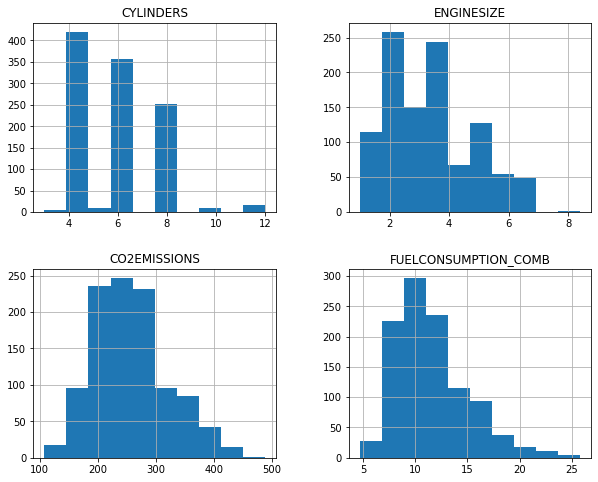

In [6]:
vis = cdf[['CYLINDERS','ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
vis.hist()
plt.gcf().set_size_inches(10, 8)
plt.show()

Now, Let's generate a scatterplot of each data with CO2 Emission.

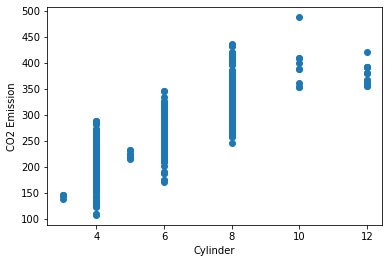

In [7]:
plt.scatter(cdf['CYLINDERS'], cdf['CO2EMISSIONS'])
plt.xlabel('Cylinder')
plt.ylabel('CO2 Emission')
plt.show()

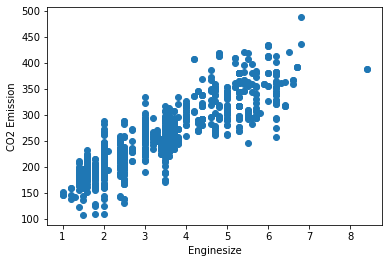

In [8]:
plt.scatter(cdf['ENGINESIZE'], cdf['CO2EMISSIONS'])
plt.xlabel('Enginesize')
plt.ylabel('CO2 Emission')
plt.show()

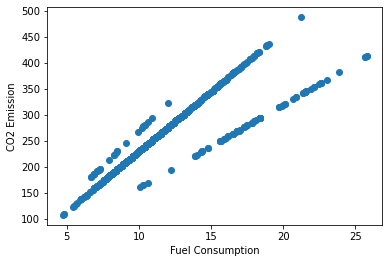

In [9]:
plt.scatter(cdf['FUELCONSUMPTION_COMB'], cdf['CO2EMISSIONS'])
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emission')
plt.show()

Observing the plots, we can assume that Engine Size and CO2 Emission are related. So, For Now, we take Engine Size into consideration.
i.e. Our __x__ is __ENGINESIZE__ and our __y__ is __CO2EMISSIONS__.

Start by creating Train and Test dataset.

For this, we randomly select how much data we will be using to train our regression model.

We use __np.random.rand()__

In [10]:
tt = np.random.rand(len(cdf)) < 0.8
train_set = cdf[tt]
test_set = cdf[~tt]

Testing and training data is divided and now it's time for training.

For training, import linear_model module (used for linear regression) from scikit-learn library

In [11]:
from sklearn import linear_model

In [12]:
reg_model = linear_model.LinearRegression()
train_x = np.asanyarray(train_set[['ENGINESIZE']])
train_y = np.asanyarray(train_set[['CO2EMISSIONS']])

__reg_model__ is the model where we will fit our training data.

train_x is the training input variable.
train_y is the training output variable.

In [13]:
reg_model.fit(train_x, train_y)

LinearRegression()

As our model is trained, we can now look at coefficient and intercept.

In [14]:
c1 = reg_model.coef_[0][0]
i1 = reg_model.intercept_[0]
print('Coefficients : ',c1 )
print('Intercept : ', i1)

Coefficients :  39.43052897195037
Intercept :  125.21127436337949


Creating a scatterplot of ENGINESIZE and CO2EMISSIONS along with the fit line over it.

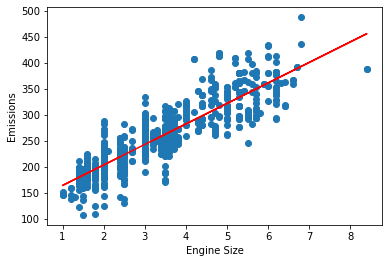

In [15]:
plt.scatter(train_set['ENGINESIZE'], train_set['CO2EMISSIONS'])
plt.plot(train_x, ((c1*train_x)+ i1), 'r')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

Model is trained.

Next part is Model Evaluation.

In [16]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test_set[['ENGINESIZE']])
test_y = np.asanyarray(test_set[['CO2EMISSIONS']])
predicted_y = reg_model.predict(test_x)

In [17]:
print("Mean absolute error (engine size): %.2f" % np.mean(np.absolute(predicted_y - test_y)))
print("Residual sum of squares (MSE) (engine size): %.2f" % np.mean((predicted_y - test_y) ** 2))
print("R2-score (engine size): %.2f" % r2_score(test_y , predicted_y) )

Mean absolute error (engine size): 23.53
Residual sum of squares (MSE) (engine size): 969.57
R2-score (engine size): 0.75


Lets see what the evaluation metrics are if we trained a regression model using the __FUELCONSUMPTION_COMB__ feature.

In [18]:
reg_model_fc = linear_model.LinearRegression()
train_x_fc = np.asanyarray(train_set[['FUELCONSUMPTION_COMB']])
train_y_fc = np.asanyarray(train_set[['CO2EMISSIONS']])

__reg_model_fc__ is the model where we will fit our training data.

train_x_fc is the training input variable.
train_y_fc is the training output variable.

In [19]:
reg_model_fc.fit(train_x_fc, train_y_fc)

LinearRegression()

As our model is trained, we can now look at coefficient and intercept.

In [20]:
c2 = reg_model_fc.coef_[0][0]
i2 = reg_model_fc.intercept_[0]
print('Coefficients : ',c2 )
print('Intercept : ', i2)

Coefficients :  16.655590667711085
Intercept :  64.35011196758634


Creating a scatterplot of FUELCONSUMPTION_COMB and CO2EMISSIONS along with the fit line over it.

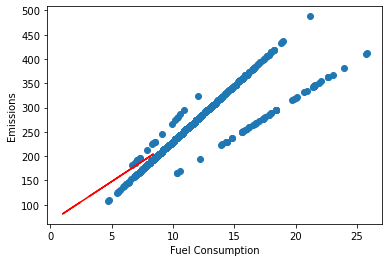

In [21]:
plt.scatter(train_set['FUELCONSUMPTION_COMB'], train_set['CO2EMISSIONS'])
plt.plot(train_x, ((c2*train_x)+ i2), 'r')
plt.xlabel('Fuel Consumption')
plt.ylabel('Emissions')
plt.show()

Model is trained.

Next part is Model Evaluation.

In [22]:
from sklearn.metrics import r2_score

test_x_fc = np.asanyarray(test_set[['FUELCONSUMPTION_COMB']])
test_y_fc = np.asanyarray(test_set[['CO2EMISSIONS']])
predicted_y_fc = reg_model.predict(test_x_fc)

In [23]:
print("Mean absolute error (fuel consumption): %.2f" % np.mean(np.absolute(predicted_y_fc - test_y_fc)))
print("Residual sum of squares (MSE) (fuel consumption): %.2f" % np.mean((predicted_y_fc - test_y_fc) ** 2))
print("R2-score (fuel consumption): %.2f" % r2_score(test_y_fc , predicted_y_fc) )

Mean absolute error (fuel consumption): 331.21
Residual sum of squares (MSE) (fuel consumption): 118704.81
R2-score (fuel consumption): -29.81


Lets see what the evaluation metrics are if we trained a regression model using the __CYLINDERS__ feature.

In [24]:
reg_model_c = linear_model.LinearRegression()
train_x_c = np.asanyarray(train_set[['CYLINDERS']])
train_y_c = np.asanyarray(train_set[['CO2EMISSIONS']])

__reg_model_c__ is the model where we will fit our training data.

train_x_c is the training input variable.
train_y_c is the training output variable.

In [25]:
reg_model_c.fit(train_x_c, train_y_c)

LinearRegression()

As our model is trained, we can now look at coefficient and intercept.

In [26]:
c3 = reg_model_c.coef_[0][0]
i3 = reg_model_c.intercept_[0]
print('Coefficients : ',c3 )
print('Intercept : ', i3)

Coefficients :  30.009153027701483
Intercept :  83.03279652606764


Creating a scatterplot of CYLINDERS and CO2EMISSIONS along with the fit line over it.

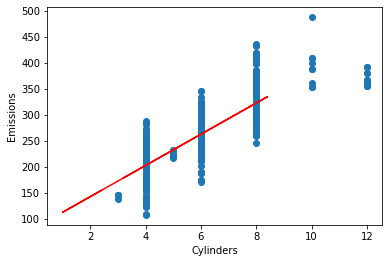

In [27]:
plt.scatter(train_set['CYLINDERS'], train_set['CO2EMISSIONS'])
plt.plot(train_x, ((c3*train_x)+ i3), 'r')
plt.xlabel('Cylinders')
plt.ylabel('Emissions')
plt.show()

Model is trained.

Next part is Model Evaluation.

In [28]:
from sklearn.metrics import r2_score

test_x_c = np.asanyarray(test_set[['CYLINDERS']])
test_y_c = np.asanyarray(test_set[['CO2EMISSIONS']])
predicted_y_c = reg_model.predict(test_x_c)

In [29]:
print("Mean absolute error (cylinders): %.2f" % np.mean(np.absolute(predicted_y_c - test_y_c)))
print("Residual sum of squares (MSE)(cylinders): %.2f" % np.mean((predicted_y_c - test_y_c) ** 2))
print("R2-score (cylinders): %.2f" % r2_score(test_y_c , predicted_y_c) )

Mean absolute error (cylinders): 100.21
Residual sum of squares (MSE)(cylinders): 11372.51
R2-score (cylinders): -1.95


We can now observe the evaluation metrics while using different features and select the best one.